In [ ]:
#Library Importing

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [ ]:
# Understand the data

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)

print(y_train.shape)
print(y_train.ndim)
print(y_train.dtype)
print(y_test.shape)

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)
(50000, 1)
2
uint8
(10000, 1)


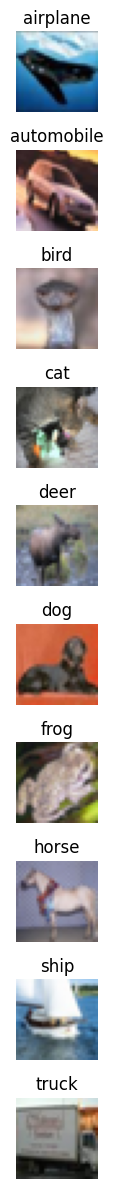

In [ ]:
# Normalize the images (scale pixel values to [0,1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded form
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualize 10 random samples from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 12))
for i in range(10):
    # randomly select one image of each class
    idx = np.where(np.argmax(y_train, axis=1) == i)[0]
    img = x_train[np.random.choice(idx)]
    plt.subplot(10, 10, i * 10 + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_names[i])
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Model 1

# Input shape is (32, 32, 3)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,206 (3.13 MB)

 Trainable params: 821,206 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=512,
    shuffle=True,
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.2411 - loss: 2.1169 - val_accuracy: 0.4597 - val_loss: 1.5602
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4696 - loss: 1.5101 - val_accuracy: 0.5208 - val_loss: 1.3758
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5398 - loss: 1.3340 - val_accuracy: 0.5385 - val_loss: 1.2927
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5653 - loss: 1.2464 - val_accuracy: 0.5632 - val_loss: 1.2390
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5850 - loss: 1.1936 - val_accuracy: 0.5839 - val_loss: 1.1983
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6072 - loss: 1.1416 - val_accuracy: 0.5936 - val_loss: 1.1738
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6143 - loss: 1.1146 - val_accuracy: 0.5977 - val_loss: 1.1489
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6235 - loss: 1.0852 - val_accuracy: 0.6043 - 

In [ ]:
# Model Evaluation

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6589 - loss: 1.0620
Test loss: 1.0829308032989502
Test accuracy: 0.6559000015258789


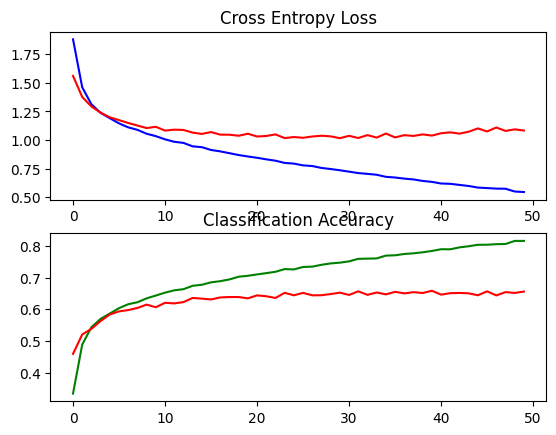

In [ ]:
# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()



In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(10000, 10)


array([[676,  16,  73,  16,  31,  13,  15,  12,  93,  55],
       [ 49, 707,  11,  14,   6,  10,   5,   7,  45, 146],
       [ 67,   6, 534,  48, 113,  95,  61,  42,  17,  17],
       [ 15,  14,  93, 395,  88, 247,  80,  31,  16,  21],
       [ 27,   2, 114,  50, 647,  40,  55,  46,  13,   6],
       [ 10,   5,  75, 125,  63, 628,  31,  44,  11,   8],
       [ 10,   5,  62,  45,  61,  47, 748,   8,   5,   9],
       [ 22,   2,  47,  32,  73,  95,   9, 695,   5,  20],
       [ 78,  38,  16,  11,   9,  14,  13,   2, 775,  44],
       [ 50,  72,  16,  15,  10,  16,   3,  24,  40, 754]])

In [ ]:
# Model 2

from keras.backend import clear_session
clear_session()

# Input shape is (32, 32, 3)
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])


# Compile
model2.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       409,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,278 (1.82 MB)

 Trainable params: 476,278 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = model2.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=50,
    batch_size=512,
    shuffle=True,
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - accuracy: 0.2807 - loss: 1.9507 - val_accuracy: 0.4814 - val_loss: 1.4339
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4991 - loss: 1.3917 - val_accuracy: 0.5534 - val_loss: 1.2688
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.5778 - loss: 1.1910 - val_accuracy: 0.5874 - val_loss: 1.1517
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6293 - loss: 1.0516 - val_accuracy: 0.6402 - val_loss: 1.0360
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6704 - loss: 0.9465 - val_accuracy: 0.6639 - val_loss: 0.9652
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6958 - loss: 0.8689 - val_accuracy: 0.6819 - val_loss: 0.9149
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7228 - loss: 0.8055 - val_accuracy: 0.6868 - val_loss: 0.8999
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7447 - loss: 0.7522 - val_accuracy: 0.7025 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7319 - loss: 2.7860
Test loss: 2.803098440170288
Test accuracy: 0.7258999943733215


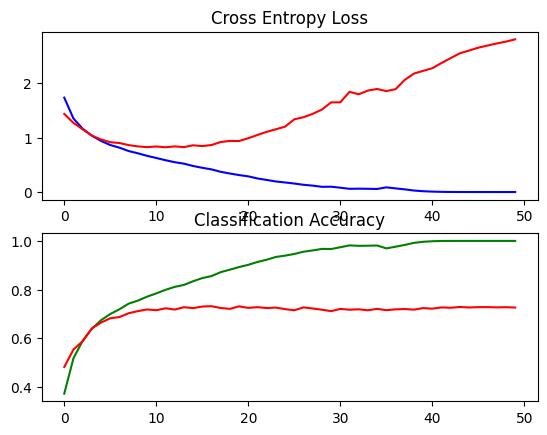

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


array([[781,  16,  50,  17,  26,  11,  11,   7,  54,  27],
       [ 16, 852,   7,  10,   7,   6,   7,   4,  20,  71],
       [ 68,   7, 612,  67,  81,  64,  55,  28,  10,   8],
       [ 24,  13,  66, 556,  66, 151,  49,  32,  23,  20],
       [ 21,   7,  93,  60, 666,  47,  35,  60,  10,   1],
       [ 15,   3,  47, 176,  45, 630,  25,  42,   7,  10],
       [ 13,   3,  52,  73,  38,  28, 772,  10,   6,   5],
       [ 19,   8,  36,  35,  67,  59,   8, 757,   3,   8],
       [ 60,  37,  19,  16,   8,   8,   4,   3, 820,  25],
       [ 35,  67,   7,  18,   9,   7,   6,  16,  22, 813]])

In [ ]:
# Model Evaluation

test_loss, test_acc = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model2.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
#Model 3

from tensorflow.keras.layers import Dropout
from keras.backend import clear_session
clear_session()

# Input shape is (32, 32, 3)

model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# Compile
model3.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model3.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 492,918 (1.88 MB)

 Trainable params: 492,918 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = model3.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=50,
    batch_size=512,
    shuffle=True,
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.2178 - loss: 2.0760 - val_accuracy: 0.4426 - val_loss: 1.5329
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.4277 - loss: 1.5602 - val_accuracy: 0.5126 - val_loss: 1.3571
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5201 - loss: 1.3343 - val_accuracy: 0.5852 - val_loss: 1.1643
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.5846 - loss: 1.1751 - val_accuracy: 0.6435 - val_loss: 1.0004
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6424 - loss: 1.0205 - val_accuracy: 0.6787 - val_loss: 0.9276
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.6752 - loss: 0.9240 - val_accuracy: 0.6785 - val_loss: 0.9171
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.7063 - loss: 0.8408 - val_accuracy: 0.7109 - val_loss: 0.8307
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.7296 - loss: 0.7726 - val_accuracy: 0.7339 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7799 - loss: 1.4013
Test loss: 1.4108405113220215
Test accuracy: 0.7781999707221985


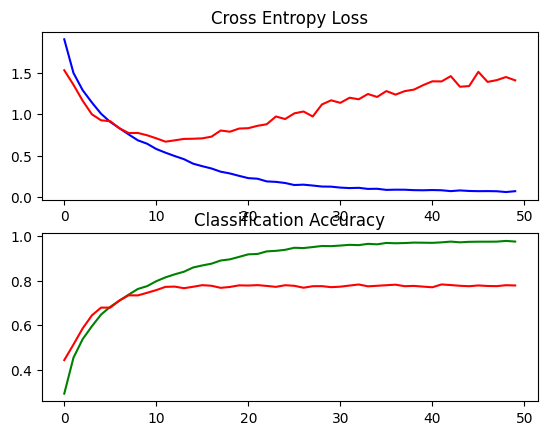

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


array([[845,  10,  41,  16,   9,   3,   8,   8,  30,  30],
       [ 16, 880,   5,   5,   2,   3,   8,   0,  13,  68],
       [ 58,   5, 669,  46,  68,  44,  71,  22,   8,   9],
       [ 22,   8,  64, 621,  52, 132,  63,  20,   8,  10],
       [ 16,   1,  66,  53, 721,  26,  64,  46,   4,   3],
       [  8,   2,  58, 161,  31, 672,  28,  28,   3,   9],
       [  2,   1,  30,  51,  15,  12, 875,   5,   5,   4],
       [ 18,   2,  33,  55,  48,  44,   8, 776,   0,  16],
       [ 60,  19,   9,   9,   4,   3,  12,   1, 861,  22],
       [ 31,  51,   7,  18,   3,   5,  10,   3,  10, 862]])

In [ ]:
# Model Evaluation

test_loss, test_acc = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model3.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
#Model 4

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.backend import clear_session
clear_session()

# Input shape is (32, 32, 3)
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# Compile
model4.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model4.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,602 (1.23 MB)

 Trainable params: 322,602 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = model4.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=80,
    batch_size=256,
    shuffle=True,
    verbose=1
)

Epoch 1/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.1250 - loss: 2.2913 - val_accuracy: 0.2415 - val_loss: 2.0534
Epoch 2/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2187 - loss: 2.0723 - val_accuracy: 0.2989 - val_loss: 1.9081
Epoch 3/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.2916 - loss: 1.9071 - val_accuracy: 0.3027 - val_loss: 1.9073
Epoch 4/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.3369 - loss: 1.7775 - val_accuracy: 0.3632 - val_loss: 1.7510
Epoch 5/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3928 - loss: 1.6441 - val_accuracy: 0.4192 - val_loss: 1.5575
Epoch 6/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4289 - loss: 1.5350 - val_accuracy: 0.4747 - val_loss: 1.4308
Epoch 7/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4711 - loss: 1.4320 - val_accuracy: 0.5000 - val_loss: 1.3586
Epoch 8/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5081 - loss: 1.3463 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7739 - loss: 1.6008
Test loss: 1.6349201202392578
Test accuracy: 0.7753000259399414


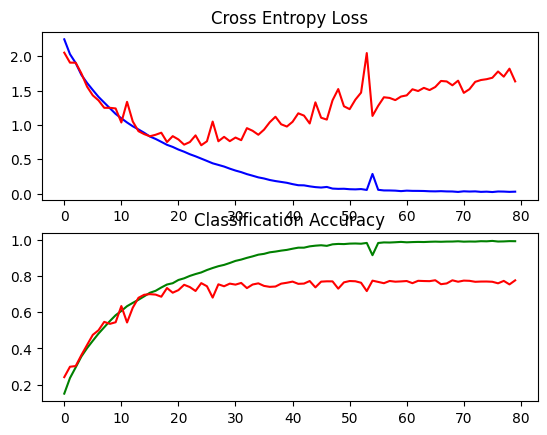

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


array([[772,  18,  50,  22,  19,   7,  23,  12,  57,  20],
       [  9, 878,   7,   6,   3,   4,  14,   6,  19,  54],
       [ 38,   3, 700,  37,  79,  60,  49,  17,  10,   7],
       [ 13,   7,  64, 542,  61, 179,  78,  32,  11,  13],
       [  7,   1,  61,  41, 765,  36,  49,  32,   7,   1],
       [  5,   2,  40, 126,  33, 705,  37,  48,   3,   1],
       [  7,   1,  40,  38,  30,  18, 853,   4,   6,   3],
       [  7,   0,  31,  25,  51,  61,   5, 810,   2,   8],
       [ 35,  21,  12,  15,  14,   4,   7,   2, 879,  11],
       [ 20,  59,   3,  11,   5,   5,  12,  13,  23, 849]])

In [ ]:
# Model Evaluation

test_loss, test_acc = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model4.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
#Model 5

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.backend import clear_session
clear_session()

# Input shape is (32, 32, 3)
model5 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# Compile
model5.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model5.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,602 (1.23 MB)

 Trainable params: 322,602 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = model5.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=80,
    batch_size=256,
    shuffle=True,
    verbose=1
)

Epoch 1/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.1974 - loss: 2.0849 - val_accuracy: 0.3984 - val_loss: 1.6099
Epoch 2/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.4137 - loss: 1.5662 - val_accuracy: 0.4730 - val_loss: 1.3915
Epoch 3/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5000 - loss: 1.3591 - val_accuracy: 0.5712 - val_loss: 1.1828
Epoch 4/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5670 - loss: 1.1845 - val_accuracy: 0.5944 - val_loss: 1.1105
Epoch 5/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6154 - loss: 1.0717 - val_accuracy: 0.6496 - val_loss: 0.9721
Epoch 6/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6516 - loss: 0.9762 - val_accuracy: 0.6730 - val_loss: 0.9312
Epoch 7/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6825 - loss: 0.8970 - val_accuracy: 0.6880 - val_loss: 0.8871
Epoch 8/80
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7079 - loss: 0.8244 - val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7915 - loss: 1.5462
Test loss: 1.561678171157837
Test accuracy: 0.7896999716758728


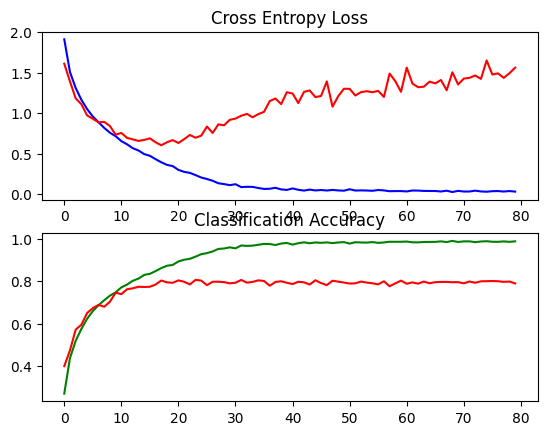

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000, 10)


array([[872,  15,  21,  11,  17,   3,   1,  15,  29,  16],
       [ 11, 920,   1,   2,   0,   2,   0,   4,   8,  52],
       [ 67,   4, 663,  35,  93,  60,  29,  42,   3,   4],
       [ 34,   7,  45, 541,  66, 193,  22,  76,   5,  11],
       [ 13,   2,  41,  33, 800,  27,   8,  72,   4,   0],
       [ 16,   1,  27,  82,  46, 736,   4,  80,   1,   7],
       [ 12,   7,  51,  42,  65,  23, 771,  15,   7,   7],
       [ 15,   0,  17,  14,  32,  36,   0, 876,   0,  10],
       [ 60,  30,   6,   9,   3,   8,   4,  10, 854,  16],
       [ 28,  62,   2,   9,   4,   7,   0,  12,  12, 864]])

In [ ]:
# Model Evaluation

test_loss, test_acc = model5.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model5.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
#Model 6

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.backend import clear_session
clear_session()

# Input shape is (32, 32, 3)
model6 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# Compile
model6.compile(
    optimizer=Adam(learning_rate=10e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model6.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,602 (1.23 MB)

 Trainable params: 322,602 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = model6.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=50,
    batch_size=128,
    shuffle=True,
    verbose=1
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.0980 - loss: 2.6667 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.0996 - loss: 2.3030 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.1036 - loss: 2.3033 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.0992 - loss: 2.3032 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.0957 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.0981 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3029
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.1011 - loss: 2.3032 - val_accuracy: 0.1000 - val_loss: 2.3036
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.0963 - loss: 2.3033 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1001 - loss: 2.3031
Test loss: 2.3032166957855225
Test accuracy: 0.10000000149011612


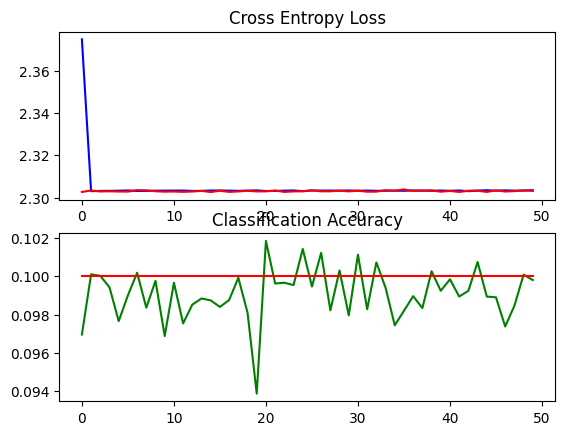

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


array([[1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1000,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [ ]:
# Model Evaluation

test_loss, test_acc = model6.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model6.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
#Model 7

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from keras.backend import clear_session
clear_session()

# Input shape is (32, 32, 3)
model7 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])


# Compile
model7.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model7.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,213,770 (4.63 MB)

 Trainable params: 1,213,770 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train
history = model7.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=80,
    batch_size=128,
    shuffle=True,
    verbose=1
)

Epoch 1/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.2041 - loss: 2.0280 - val_accuracy: 0.4308 - val_loss: 1.5286
Epoch 2/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.4490 - loss: 1.4648 - val_accuracy: 0.5570 - val_loss: 1.2216
Epoch 3/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5698 - loss: 1.1774 - val_accuracy: 0.6519 - val_loss: 0.9723
Epoch 4/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6318 - loss: 1.0224 - val_accuracy: 0.6849 - val_loss: 0.8745
Epoch 5/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6877 - loss: 0.8788 - val_accuracy: 0.7134 - val_loss: 0.8167
Epoch 6/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.7270 - loss: 0.7802 - val_accuracy: 0.7540 - val_loss: 0.7166
Epoch 7/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.7533 - loss: 0.6914 - val_accuracy: 0.7678 - val_loss: 0.6714
Epoch 8/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7816 - loss: 0.6199 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8447 - loss: 1.0295
Test loss: 1.0514577627182007
Test accuracy: 0.845300018787384


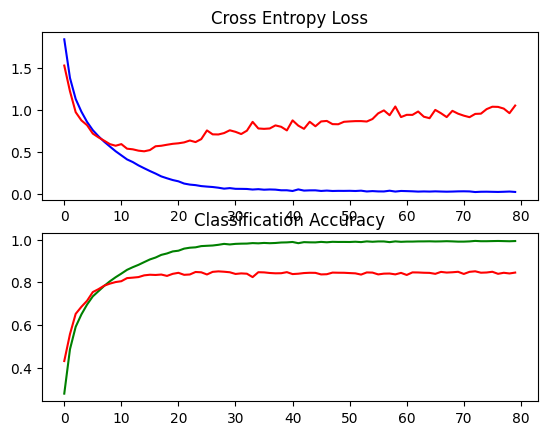

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
(10000, 10)


array([[865,  17,  39,  16,   6,   3,   1,   6,  27,  20],
       [  7, 939,   2,   1,   0,   3,   0,   2,   3,  43],
       [ 29,   3, 813,  33,  28,  50,  11,  20,   8,   5],
       [ 10,   6,  40, 697,  29, 147,  24,  30,   7,  10],
       [ 10,   2,  49,  43, 813,  28,  11,  41,   1,   2],
       [  6,   2,  22,  89,  21, 825,   2,  29,   1,   3],
       [  5,   5,  49,  59,  19,  25, 821,   9,   1,   7],
       [ 10,   2,  23,  21,  19,  36,   1, 884,   0,   4],
       [ 34,  36,  13,   6,   0,   3,   1,   2, 881,  24],
       [  8,  54,   3,   6,   0,   2,   0,   3,   9, 915]])

In [ ]:
# Model Evaluation of model 7

test_loss, test_acc = model7.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model7.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
# Model 8

from keras.backend import clear_session
clear_session()

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import Sequential, regularizers, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

wd = 5e-4

# Padding and cropping (standard CIFAR aug)
# Input shape is (32, 32, 3)
data_augmentation = Sequential([
    layers.ZeroPadding2D(4, input_shape=(32,32,3)),
    layers.RandomCrop(32,32),
    layers.RandomFlip("horizontal")
])

model8 = Sequential([
    data_augmentation,
    Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(256, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(wd)),
    Dropout(0.4),
    Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(wd))
])


# Compile
model8.compile(
    optimizer=Adam(learning_rate=5e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model8.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             

 Total params: 1,216,458 (4.64 MB)

 Trainable params: 1,214,666 (4.63 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
# Train
history = model8.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=80,
    batch_size=128,
    shuffle=True,
    verbose=1
)

Epoch 1/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.3030 - loss: 2.4376 - val_accuracy: 0.1487 - val_loss: 3.7069
Epoch 2/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.5382 - loss: 1.6821 - val_accuracy: 0.3791 - val_loss: 2.1870
Epoch 3/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.6340 - loss: 1.3830 - val_accuracy: 0.5610 - val_loss: 1.5154
Epoch 4/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.6765 - loss: 1.2213 - val_accuracy: 0.5667 - val_loss: 1.5627
Epoch 5/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.7212 - loss: 1.0925 - val_accuracy: 0.5420 - val_loss: 1.5679
Epoch 6/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.7558 - loss: 0.9902 - val_accuracy: 0.7372 - val_loss: 1.0713
Epoch 7/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.7726 - loss: 0.9297 - val_accuracy: 0.5487 - val_loss: 1.6159
Epoch 8/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.7950 - loss: 0.8631 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8383 - loss: 0.7461
Test loss: 0.7534798383712769
Test accuracy: 0.8373000025749207


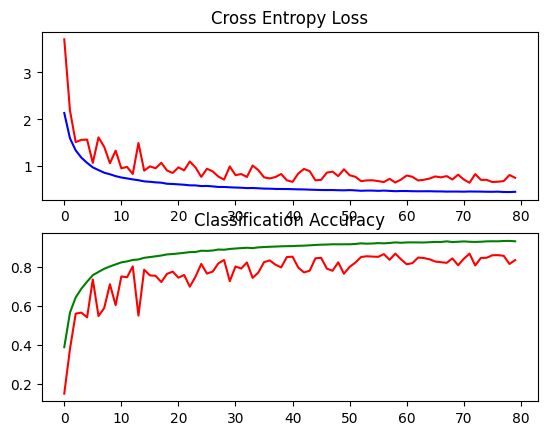

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
(10000, 10)


array([[732,   1,  17,  13,  20,   1,   4,   0, 184,  28],
       [  5, 820,   2,   1,   0,   0,   2,   0,  73,  97],
       [ 32,   0, 789,  41,  34,   9,  59,   5,  27,   4],
       [  5,   0,  29, 785,  51,  24,  59,   7,  32,   8],
       [  2,   0,  15,  22, 890,   4,  35,   9,  22,   1],
       [  0,   2,  23, 202,  38, 656,  32,  20,  21,   6],
       [  5,   0,  12,   8,  12,   0, 946,   1,  11,   5],
       [  8,   0,  19,  27,  42,  18,   4, 846,  20,  16],
       [  7,   2,   2,   1,   1,   0,   1,   0, 982,   4],
       [  5,   7,   3,   5,   0,   0,   1,   0,  52, 927]])

In [ ]:
# Model Evaluation of model 8

test_loss, test_acc = model8.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model8.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
# Model 9

from keras.backend import clear_session
clear_session()

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, BatchNormalization, Activation
from tensorflow.keras import regularizers, layers
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras

wd = 5e-4

# Padding and cropping (standard CIFAR aug)
# Input shape is (32, 32, 3)
data_augmentation = Sequential([
    layers.ZeroPadding2D(4, input_shape=(32,32,3)),
    layers.RandomCrop(32,32),
    layers.RandomFlip("horizontal")
])

model9 = Sequential([
    data_augmentation,
    Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(256, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(wd)),
    Dropout(0.4),
    Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(wd))
])


# Optimizer: SGD + cosine decay
steps_per_epoch = len(x_train) // 128
lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.05, decay_steps=steps_per_epoch*80, alpha=0.02
)
opt = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# Compile
model9.compile(
    optimizer=opt,
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)


model9.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             

 Total params: 1,216,458 (4.64 MB)

 Trainable params: 1,214,666 (4.63 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
# Train

history = model9.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=80,
    batch_size=128,
    shuffle=True,
    verbose=1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)]
)

Epoch 1/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.2878 - loss: 2.4880 - val_accuracy: 0.1310 - val_loss: 2.9851
Epoch 2/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.5155 - loss: 1.9116 - val_accuracy: 0.4664 - val_loss: 1.9264
Epoch 3/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.6252 - loss: 1.6397 - val_accuracy: 0.5709 - val_loss: 1.6638
Epoch 4/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.6793 - loss: 1.4870 - val_accuracy: 0.4730 - val_loss: 1.8871
Epoch 5/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7306 - loss: 1.3709 - val_accuracy: 0.6615 - val_loss: 1.5237
Epoch 6/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.7566 - loss: 1.2963 - val_accuracy: 0.4550 - val_loss: 1.8516
Epoch 7/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7789 - loss: 1.2441 - val_accuracy: 0.5411 - val_loss: 1.7166
Epoch 8/80
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7940 - loss: 1.2069 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9210 - loss: 0.8076
Test loss: 0.8066146969795227
Test accuracy: 0.9205999970436096


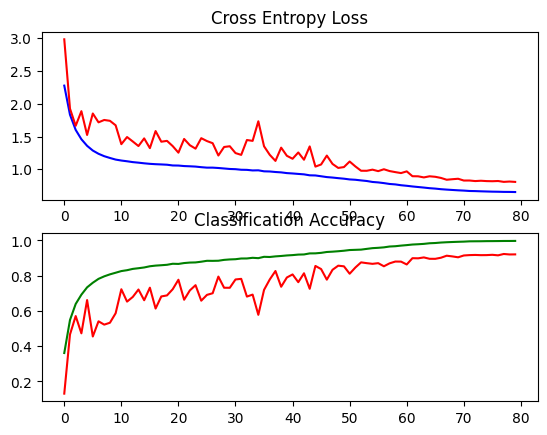

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
(10000, 10)


array([[942,   1,  11,   7,   3,   2,   1,   0,  26,   7],
       [  9, 942,   0,   4,   0,   0,   1,   0,  12,  32],
       [ 22,   0, 900,  34,  16,  12,  10,   0,   5,   1],
       [  7,   1,  25, 863,  17,  57,  16,   8,   3,   3],
       [  4,   0,  27,  15, 933,   8,   5,   5,   2,   1],
       [  5,   1,  24,  86,  14, 865,   1,   3,   0,   1],
       [  4,   0,  13,  32,   9,   3, 936,   1,   0,   2],
       [ 10,   0,   7,  22,  15,  20,   1, 921,   3,   1],
       [ 29,   3,   3,   2,   0,   1,   1,   0, 955,   6],
       [ 13,  19,   0,   5,   0,   0,   1,   0,  13, 949]])

In [ ]:
# Model Evaluation of model 9

test_loss, test_acc = model9.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model9.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
# Model 10

from keras.backend import clear_session
clear_session()

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, BatchNormalization, Activation
from tensorflow.keras import regularizers, layers
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras

wd = 5e-4

# Padding and cropping (standard CIFAR aug)
# Input shape is (32, 32, 3)

norm = layers.Normalization(axis=-1)
norm.adapt(x_train.astype("float32")/255.0)  # do this once

data_augmentation = Sequential([
    layers.ZeroPadding2D(4, input_shape=(32,32,3)),
    layers.RandomCrop(32,32),
    layers.RandomFlip("horizontal"),
    norm
])

model10 = Sequential([
    data_augmentation,
    Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(256, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(wd)),
    Dropout(0.4),
    Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(wd))
])


# Optimizer: SGD + cosine decay

BATCH = 128
steps_per_epoch = len(x_train)//BATCH
total_epochs = 200
warmup_epochs = 5
base_lr = 0.1

class WarmupCosine(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __call__(self, step):
        epoch = tf.cast(step, tf.float32) / steps_per_epoch
        lr = tf.cond(epoch < warmup_epochs,
            lambda: base_lr * (epoch / warmup_epochs),
            lambda: 0.001 + 0.5*(base_lr-0.001)*(1+tf.cos(np.pi*(epoch-warmup_epochs)/(total_epochs-warmup_epochs))))
        return lr

lr_schedule = WarmupCosine()

opt = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# Compile
model10.compile(
    optimizer=opt,
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)


model10.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       294,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       589,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             

 Total params: 1,216,465 (4.64 MB)

 Trainable params: 1,214,666 (4.63 MB)

 Non-trainable params: 1,799 (7.03 KB)

In [ ]:
history = model10.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=200,
    batch_size=128,
    shuffle=True,
    verbose=2,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)]
)

Epoch 1/200
391/391 - 22s - 57ms/step - accuracy: 0.2985 - loss: 2.5178 - val_accuracy: 0.2429 - val_loss: 2.5594
Epoch 2/200
391/391 - 19s - 48ms/step - accuracy: 0.5148 - loss: 1.9910 - val_accuracy: 0.2779 - val_loss: 2.5077
Epoch 3/200
391/391 - 19s - 48ms/step - accuracy: 0.6074 - loss: 1.7502 - val_accuracy: 0.5191 - val_loss: 1.9054
Epoch 4/200
391/391 - 19s - 48ms/step - accuracy: 0.6635 - loss: 1.5833 - val_accuracy: 0.2953 - val_loss: 2.4847
Epoch 5/200
391/391 - 19s - 48ms/step - accuracy: 0.7044 - loss: 1.4641 - val_accuracy: 0.3731 - val_loss: 2.1978
Epoch 6/200
391/391 - 19s - 48ms/step - accuracy: 0.7353 - loss: 1.3865 - val_accuracy: 0.4022 - val_loss: 2.0160
Epoch 7/200
391/391 - 19s - 48ms/step - accuracy: 0.7622 - loss: 1.3173 - val_accuracy: 0.6186 - val_loss: 1.6294
Epoch 8/200
391/391 - 19s - 49ms/step - accuracy: 0.7788 - loss: 1.2833 - val_accuracy: 0.4220 - val_loss: 2.0555
Epoch 9/200
391/391 - 19s - 49ms/step - accuracy: 0.7863 - loss: 1.2733 - val_accuracy: 

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7721 - loss: 1.3959
Test loss: 1.3920068740844727
Test accuracy: 0.7713000178337097


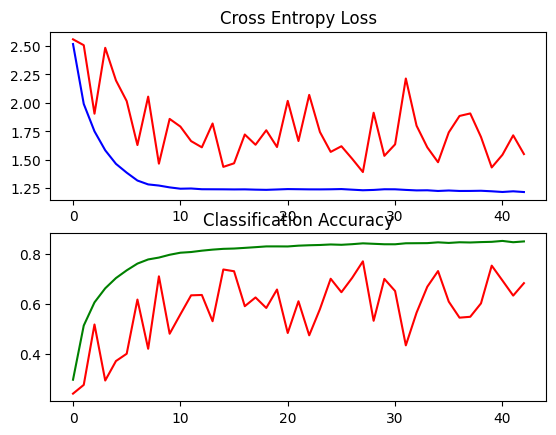

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
(10000, 10)


array([[785,  16,  68,  42,  27,   7,   9,  25,  17,   4],
       [ 16, 894,  18,  21,   7,   2,   2,  10,   3,  27],
       [ 34,   2, 692,  53,  89,  37,  47,  42,   3,   1],
       [ 12,   2,  56, 559, 125,  77,  71,  92,   2,   4],
       [  4,   0,  31,  16, 878,   7,  23,  40,   1,   0],
       [  5,   0,  48, 100,  65, 666,  17,  98,   0,   1],
       [  4,   1,  36,  25,  51,   7, 856,  20,   0,   0],
       [  4,   0,  25,  15,  80,   9,   5, 861,   0,   1],
       [ 89,  35,  24,  32,  37,   6,   6,  18, 738,  15],
       [ 40,  65,  13,  28,  21,   5,   9,  17,  18, 784]])

In [ ]:
# Model Evaluation of model 10

test_loss, test_acc = model10.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model10.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
confusion_matrix(gt, predictions)

In [ ]:
# Model 11

from keras.backend import clear_session
clear_session()

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, BatchNormalization, Activation
from tensorflow.keras import regularizers, layers
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset and one-hot encode labels
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


wd = 5e-4

# Padding and cropping (standard CIFAR aug)
# Input shape is (32, 32, 3)

norm = layers.Normalization(axis=-1)
norm.adapt(x_train.astype("float32")/255.0)  # do this once

data_augmentation = Sequential([
    layers.ZeroPadding2D(4), # Removed input_shape
    layers.RandomCrop(32,32),
    layers.RandomFlip("horizontal"),
    norm
])

model11 = Sequential([
    data_augmentation,
    Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    Conv2D(256, (3, 3), padding='same', use_bias=False, kernel_regularizer=regularizers.l2(wd)),
    BatchNormalization(), Activation('relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(wd)),
    Dropout(0.4),
    Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(wd))
])


# Optimizer: SGD + cosine decay

BATCH = 128
steps_per_epoch = len(x_train)//BATCH
total_epochs = 200
warmup_epochs = 5
base_lr = 0.1

class WarmupCosine(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __call__(self, step):
        epoch = tf.cast(step, tf.float32) / steps_per_epoch
        lr = tf.cond(epoch < warmup_epochs,
            lambda: base_lr * (epoch / warmup_epochs),
            lambda: 0.001 + 0.5*(base_lr-0.001)*(1+tf.cos(np.pi*(epoch-warmup_epochs)/(total_epochs-warmup_epochs))))
        return lr

lr_schedule = WarmupCosine()

opt = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# Compile
model11.compile(
    optimizer=opt,
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)


model11.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             

 Total params: 7 (32.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7 (32.00 B)

In [ ]:
history = model11.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),   # so you also see val curves
    epochs=200,
    batch_size=128,
    shuffle=True,
    verbose=2,
)

NameError: name 'model11' is not defined

In [ ]:
# Model Evaluation of model 11

test_loss, test_acc = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model11.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test, axis=1)
#confusion_matrix(gt, predictions)

NameError: name 'model11' is not defined

In [ ]:
# Model 12

from keras.backend import clear_session
clear_session()


from tensorflow import keras
from tensorflow.keras import Sequential, layers
import numpy as np
from tensorflow.keras import layers

# Load CIFAR-10 dataset
(x_train_v2, y_train_v2), (x_test_v2, y_test_v2) = cifar10.load_data()

# Input shape is (32, 32, 3)  → we resize to 224×224 for MobileNetV2
data_aug_224 = Sequential([
    layers.Resizing(224, 224),                                      # 32→224
    layers.RandomFlip("horizontal"),                                # light aug
    layers.RandomContrast(0.1),
    layers.Lambda(keras.applications.mobilenet_v2.preprocess_input) # MobileNetV2 preprocessing
])

model12 = Sequential([
    data_aug_224,
    keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_shape=(224,224,3)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.25),
    layers.Dense(10, activation="softmax")
])

# Freeze the pretrained backbone (head-only)
model12.layers[1].trainable = False

# Compile
model12.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),            # fast head training
    loss="sparse_categorical_crossentropy",                                # one-hot labels
    metrics=["accuracy"]
)

model12.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model12.fit(
    x_train_v2, y_train_v2,
    validation_data=(x_test_v2, y_test_v2),   # so you also see val curves
    epochs=10,
    batch_size=64,
    shuffle=True,
    verbose=2,
)

Epoch 1/10
782/782 - 74s - 94ms/step - accuracy: 0.7702 - loss: 0.6751 - val_accuracy: 0.8354 - val_loss: 0.4738
Epoch 2/10
782/782 - 41s - 53ms/step - accuracy: 0.8239 - loss: 0.5118 - val_accuracy: 0.8322 - val_loss: 0.4841
Epoch 3/10
782/782 - 42s - 54ms/step - accuracy: 0.8340 - loss: 0.4812 - val_accuracy: 0.8379 - val_loss: 0.4659
Epoch 4/10
782/782 - 42s - 54ms/step - accuracy: 0.8383 - loss: 0.4742 - val_accuracy: 0.8474 - val_loss: 0.4419
Epoch 5/10
782/782 - 42s - 53ms/step - accuracy: 0.8407 - loss: 0.4639 - val_accuracy: 0.8461 - val_loss: 0.4465
Epoch 6/10
782/782 - 42s - 54ms/step - accuracy: 0.8416 - loss: 0.4597 - val_accuracy: 0.8453 - val_loss: 0.4559
Epoch 7/10
782/782 - 42s - 54ms/step - accuracy: 0.8409 - loss: 0.4621 - val_accuracy: 0.8513 - val_loss: 0.4368
Epoch 8/10
782/782 - 42s - 54ms/step - accuracy: 0.8414 - loss: 0.4608 - val_accuracy: 0.8489 - val_loss: 0.4374
Epoch 9/10
782/782 - 42s - 54ms/step - accuracy: 0.8446 - loss: 0.4599 - val_accuracy: 0.8521 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8448 - loss: 0.4537
Test loss: 0.4403945207595825
Test accuracy: 0.8478000164031982


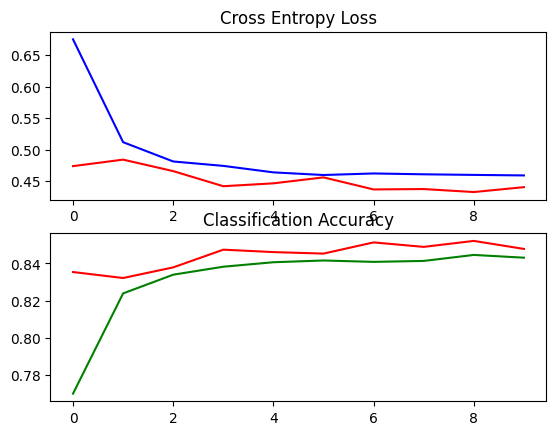

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step
(10000, 10)


In [ ]:
# Model Evaluation of model 12

test_loss, test_acc = model12.evaluate(x_test_v2, y_test_v2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Plot Loss & Accuracy

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
predictions = model12.predict(x_test)

print(predictions.shape)
predictions = np.argmax(predictions, axis=1)

gt = np.argmax(y_test_v2, axis=1)
#confusion_matrix(gt, predictions)

In [ ]:
# Model 13

# ================================================
# MobileNetV2 → CIFAR-10 (two-phase fine-tune, 94%+)
# Single, ready-to-run block (fixed + robust)
# ================================================
from keras.backend import clear_session
clear_session()

from tensorflow import keras
from tensorflow.keras import Sequential, layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ------------------ DATA ------------------
# Keep images as raw 0–255 uint8 (MobileNetV2 preprocess expects that)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.squeeze().astype("int32")
y_test  = y_test.squeeze().astype("int32")

# validation split (10%)
VAL_SPLIT = 0.1
n_val = int(len(x_train) * VAL_SPLIT)
x_val, y_val = x_train[:n_val], y_train[:n_val]
x_tr,  y_tr  = x_train[n_val:], y_train[n_val:]

BATCH = 128
NUM_CLASSES = 10

# ------------------ AUG + PREPROCESS ------------------
# If your x_* were accidentally scaled to [0,1] elsewhere, add the line
# layers.Lambda(lambda z: z*255.0) BEFORE preprocess_input.
data_aug_224 = Sequential([
    layers.Resizing(224, 224, input_shape=(32, 32, 3)),   # declares input shape → model builds immediately
    layers.RandomFlip("horizontal"),
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.10),
    layers.RandomTranslation(0.05, 0.05),
    layers.RandomZoom(0.10),
    layers.Lambda(keras.applications.mobilenet_v2.preprocess_input)  # expects 0–255 RGB
], name="aug_224_mbv2")

# ------------------ BUILD MODEL ------------------
# Create the backbone as a variable so we can refer to it directly (no brittle indexing)
mbv2 = keras.applications.MobileNetV2(
    include_top=False, weights="imagenet", input_shape=(224, 224, 3)
)

model = Sequential([
    data_aug_224,                 # resize + aug + preprocess
    mbv2,                         # pretrained feature extractor
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.25),
    layers.Dense(NUM_CLASSES, activation="softmax")
])

# ------------------ PHASE 1: HEAD-ONLY WARM-UP ------------------
mbv2.trainable = False  # freeze backbone
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",   # labels are ints 0..9
    metrics=["accuracy"]
)

print("Phase 1 — trainable params (head-only):", model.count_params())
hist_head = model.fit(
    x_tr, y_tr,
    validation_data=(x_val, y_val),
    epochs=5,                      # 5 is usually enough
    batch_size=BATCH,
    shuffle=True,
    verbose=2,
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)]
)

# ------------------ PHASE 2: FINE-TUNE LAST 1/2 ------------------
# Unfreeze the last half of MobileNetV2
n_layers = len(mbv2.layers)
freeze_until = n_layers // 2  # freeze first half, fine-tune last half
for i, lyr in enumerate(mbv2.layers):
    lyr.trainable = (i >= freeze_until)

# Small cosine LR + SGD momentum → stable fine-tuning
steps_per_epoch = len(x_tr) // BATCH
total_epochs_ft = 50
base_lr = 3e-4

class CosineSmall(keras.optimizers.schedules.LearningRateSchedule):
    def __call__(self, step):
        prog = tf.cast(step, tf.float32) / (steps_per_epoch * total_epochs_ft)
        prog = tf.clip_by_value(prog, 0.0, 1.0)
        return 1e-5 + 0.5*(base_lr-1e-5)*(1.0 + tf.cos(np.pi*prog))

    def get_config(self):
        return {
            "steps_per_epoch": steps_per_epoch,
            "total_epochs_ft": total_epochs_ft,
            "base_lr": base_lr,
        }

opt_ft = keras.optimizers.SGD(learning_rate=CosineSmall(), momentum=0.9, nesterov=True)

model.compile(optimizer=opt_ft, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

print("Phase 2 — trainable params (after unfreezing last 1/2):", model.count_params())
hist_ft = model.fit(
    x_tr, y_tr,
    validation_data=(x_val, y_val),
    epochs=total_epochs_ft,
    batch_size=BATCH,
    shuffle=True,
    verbose=2,
    callbacks=[
        keras.callbacks.ModelCheckpoint("mbv2_finetune_best.keras", save_best_only=True, monitor="val_loss"),
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)
    ]
)

# ------------------ EVALUATION ------------------
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=BATCH, verbose=0)
print(f"\nMobileNetV2 fine-tuned — test acc: {test_acc:.4f} | loss: {test_loss:.4f}")

# Confusion matrix (optional for your report)
preds = model.predict(x_test, batch_size=BATCH, verbose=0).argmax(1)
cm = confusion_matrix(y_test, preds)
print("Confusion matrix:\n", cm)

# Curves (optional)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title("Loss")
plt.plot(hist_head.history["loss"]+hist_ft.history["loss"], label="train")
plt.plot(hist_head.history["val_loss"]+hist_ft.history["val_loss"], label="val"); plt.legend()
plt.subplot(1,2,2); plt.title("Accuracy")
plt.plot(hist_head.history["accuracy"]+hist_ft.history["accuracy"], label="train")
plt.plot(hist_head.history["val_accuracy"]+hist_ft.history["val_accuracy"], label="val"); plt.legend()
plt.tight_layout(); plt.show()


# ---------- Save results ----------
# 1. Final exportable model (for Hugging Face or reuse)
model13.save(f"artifacts/{run_name}.keras")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Phase 1 — trainable params (head-only): 2270794
Epoch 1/5
352/352 - 59s - 168ms/step - accuracy: 0.6337 - loss: 1.0553 - val_accuracy: 0.7970 - val_loss: 0.5738
Epoch 2/5
352/352 - 49s - 138ms/step - accuracy: 0.7231 - loss: 0.7968 - val_accuracy: 0.8126 - val_loss: 0.5276
Epoch 3/5
352/352 - 49s - 139ms/step - accuracy: 0.7383 - loss: 0.7516 - val_accuracy: 0.8176 - val_loss: 0.5197
Epoch 4/5
352/352 - 49s - 139ms/step - accuracy: 0.7454 - loss: 0.7325 - val_accuracy: 0.8216 - val_loss: 0.5037
Epoch 5/5
352/352 - 49s - 139ms/step - accuracy: 0.7491 - loss: 0.7254 - val_accuracy: 0.8254 - val_loss: 0.4997
Phase 2 — trainable params (after unfreezing last 1/2): 2270794
Epoch 1/50
352/352 - 103s - 294ms/step - accuracy: 0.7639 - loss: 0.6929 - val_accuracy: 0.8550 - val_loss: 0.4268
Epoch 2/50
352/352 - 87s - 247ms/step - accuracy: 0.8318 - loss: 0.4936 - val_accuracy: 0.8716 - val_loss: 0.3946
Epoch 3/50
352/352 - 87s - 247ms/step - accur

In [ ]:
# Model SUPREME M14

# ============================
# CIFAR-10 SOTA-ish: WRN-28-10
# ============================
from keras.backend import clear_session
clear_session()

import os, numpy as np, tensorflow as tf, matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# ---------- Repro ----------
SEED = 42
np.random.seed(SEED); tf.random.set_seed(SEED)
# Optional AMP (small speed bump if your GPU supports it)
# tf.keras.mixed_precision.set_global_policy("mixed_float16")

# ---------- Data ----------
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.squeeze().astype("int32")
y_test  = y_test.squeeze().astype("int32")

# Train/val split (10% val)
n_train = int(0.9 * len(x_train))
x_tr, y_tr = x_train[:n_train], y_train[:n_train]
x_val, y_val = x_train[n_train:], y_train[n_train:]  # keep paired order

# Float in [0,1] for normalization layer
x_tr = x_tr.astype("float32")/255.0
x_val = x_val.astype("float32")/255.0
x_te  = x_test.astype("float32")/255.0

# One-hot labels (MixUp needs soft labels)
NUM_CLASSES = 10
y_tr_oh  = keras.utils.to_categorical(y_tr,  NUM_CLASSES)
y_val_oh = keras.utils.to_categorical(y_val, NUM_CLASSES)
y_te_oh  = keras.utils.to_categorical(y_test,NUM_CLASSES)

# Per-channel normalization (fit on training)
norm = layers.Normalization(axis=-1)
norm.adapt(x_tr)

# ---------- Simple Cutout (Random Erasing) ----------
class RandomCutout(layers.Layer):
    def __init__(self, erase_frac=0.25, **kwargs):
        super().__init__(**kwargs)
        self.erase_frac = erase_frac

    def call(self, x, training=None):
        if not training:
            return x
        # x: [B,H,W,C]
        shape = tf.shape(x)
        B, H, W, C = shape[0], shape[1], shape[2], shape[3]
        erase_h = tf.cast(tf.round(self.erase_frac * tf.cast(H, tf.float32)), tf.int32)
        erase_w = tf.cast(tf.round(self.erase_frac * tf.cast(W, tf.float32)), tf.int32)

        # random centers
        cy = tf.random.uniform([B], minval=0, maxval=H, dtype=tf.int32)
        cx = tf.random.uniform([B], minval=0, maxval=W, dtype=tf.int32)

        y1 = tf.clip_by_value(cy - erase_h//2, 0, H)
        y2 = tf.clip_by_value(y1 + erase_h, 0, H)
        x1 = tf.clip_by_value(cx - erase_w//2, 0, W)
        x2 = tf.clip_by_value(x1 + erase_w, 0, W)

        # build masks per sample
        def cutout_one(i):
            img = x[i]
            y1i, y2i, x1i, x2i = y1[i], y2[i], x1[i], x2[i]
            # zero the rectangle
            upper = img[:y1i, :, :]
            middle_left  = img[y1i:y2i, :x1i, :]
            middle_zero  = tf.zeros([y2i - y1i, x2i - x1i, C], dtype=img.dtype)
            middle_right = img[y1i:y2i, x2i:, :]
            lower = img[y2i:, :, :]
            middle = tf.concat([middle_left, middle_zero, middle_right], axis=1)
            return tf.concat([upper, middle, lower], axis=0)

        return tf.map_fn(cutout_one, tf.range(B), fn_output_signature=x.dtype)

# ---------- Augmentation ----------
BATCH = 128
AUTO  = tf.data.AUTOTUNE
alpha_mixup = 0.2  # MixUp strength

data_aug = keras.Sequential([
    layers.ZeroPadding2D(4, input_shape=(32,32,3)),
    layers.RandomCrop(32,32),
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(0.05, 0.05),
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.05),
    RandomCutout(erase_frac=0.25),
    norm,  # standardize after spatial augs
], name="data_aug")

def make_train_ds_mixup():
    ds = tf.data.Dataset.from_tensor_slices((x_tr, tf.cast(y_tr_oh, tf.float32))) \
         .shuffle(8192, seed=SEED).batch(BATCH, drop_remainder=True)
    ds = ds.map(lambda x,y: (data_aug(x, training=True), y), num_parallel_calls=AUTO)

    # MixUp without tfp: lam ~ Beta(alpha,alpha) via two Gammas
    def mixup(x, y):
        g1 = tf.squeeze(tf.random.gamma([1], alpha_mixup))
        g2 = tf.squeeze(tf.random.gamma([1], alpha_mixup))
        lam = tf.cast(g1/(g1+g2), tf.float32)
        idx = tf.random.shuffle(tf.range(tf.shape(x)[0]))
        x2, y2 = tf.gather(x, idx), tf.gather(y, idx)
        return lam*x + (1-lam)*x2, lam*y + (1-lam)*y2

    ds = ds.map(mixup, num_parallel_calls=AUTO)
    return ds.prefetch(AUTO)

def make_eval_ds(x, y):
    ds = tf.data.Dataset.from_tensor_slices((x, y)).batch(BATCH)
    ds = ds.map(lambda a,b: (norm(a, training=False), b), num_parallel_calls=AUTO)
    return ds.prefetch(AUTO)

train_ds = make_train_ds_mixup().repeat()    # <- infinite stream (fix)
val_ds   = make_eval_ds(x_val, y_val_oh)
test_ds  = make_eval_ds(x_te,  y_te_oh)

# ---------- WRN-28-10 ----------
wd = 5e-4
reg = regularizers.l2(wd)

def wrn_block(x, filters, stride, drop=0.3):   # <- add dropout (fix)
    in_ch = x.shape[-1]
    out = layers.BatchNormalization()(x); out = layers.ReLU()(out)
    out = layers.Conv2D(filters, 3, padding="same", use_bias=False, kernel_regularizer=reg)(out)
    if drop>0: out = layers.Dropout(drop)(out)
    out = layers.BatchNormalization()(out); out = layers.ReLU()(out)
    out = layers.Conv2D(filters, 3, strides=stride, padding="same", use_bias=False, kernel_regularizer=reg)(out)
    if stride!=1 or in_ch!=filters:
        x = layers.Conv2D(filters, 1, strides=stride, padding="same", use_bias=False, kernel_regularizer=reg)(x)
    return layers.Add()([x, out])

depth, widen = 28, 10
N = (depth - 4)//6              # blocks per stage = 4
channels = [16*widen, 32*widen, 64*widen]

inp = layers.Input(shape=(32,32,3))
x = layers.Conv2D(16, 3, padding="same", use_bias=False, kernel_regularizer=reg)(inp)

for i in range(N): x = wrn_block(x, channels[0], stride=1)
for i in range(N): x = wrn_block(x, channels[1], stride=(2 if i==0 else 1))
for i in range(N): x = wrn_block(x, channels[2], stride=(2 if i==0 else 1))

x = layers.BatchNormalization()(x); x = layers.ReLU()(x)
x = layers.GlobalAveragePooling2D()(x)
out = layers.Dense(NUM_CLASSES, activation="softmax", kernel_regularizer=reg)(x)

model = keras.Model(inp, out, name="WRN_28_10")
model.summary()

# ---------- Optimizer & schedule ----------
steps_per_epoch = len(x_tr)//BATCH           # <- used by fit (fix)
total_epochs    = 300                         # max-accuracy run
warmup_epochs   = 5
base_lr         = 0.1

class WarmupCosine(keras.optimizers.schedules.LearningRateSchedule):
    def __call__(self, step):
        epoch = tf.cast(step, tf.float32) / steps_per_epoch
        def warm(): return base_lr*(epoch/warmup_epochs)
        def cosd():
            prog = tf.clip_by_value((epoch - warmup_epochs)/(total_epochs - warmup_epochs), 0., 1.)
            return 1e-3 + 0.5*(base_lr-1e-3)*(1. + tf.cos(np.pi*prog))
        return tf.where(epoch < warmup_epochs, warm(), cosd())
    def get_config(self):
        return {
            "steps_per_epoch": steps_per_epoch,
            "total_epochs": total_epochs,
            "warmup_epochs": warmup_epochs,
            "base_lr": base_lr,
        }

lr_schedule = WarmupCosine()

# Stable SGD (avoid experimental EMA for reliability)
opt = keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)

# MixUp uses soft labels → categorical CE, no label smoothing
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# ---------- Train ----------
OUT = Path("runs_wrn_max"); OUT.mkdir(exist_ok=True, parents=True)
callbacks = [
    keras.callbacks.ModelCheckpoint(str(OUT/"best.keras"), monitor="val_loss", save_best_only=True),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, restore_best_weights=True),
    keras.callbacks.CSVLogger(str(OUT/"log.csv")),
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    steps_per_epoch=steps_per_epoch,   # <- critical with .repeat()
    callbacks=callbacks,
    verbose=2
)

# ---------- Evaluate ----------
test_loss, test_acc = model.evaluate(test_ds, verbose=0)
print(f"WRN-28-10 (MixUp) — test acc: {test_acc:.4f} | loss: {test_loss:.4f}")

# Optional TTA (flip)
def predict_tta(m, x):
    # normalize once
    x_norm = norm(x, training=False).numpy()
    p1 = m.predict(x_norm, batch_size=BATCH, verbose=0)
    x_flip = x_norm[:, :, ::-1, :]
    p2 = m.predict(x_flip, batch_size=BATCH, verbose=0)
    return 0.5*(p1+p2)

probs_tta = predict_tta(model, x_te)
preds_tta = probs_tta.argmax(1)
acc_tta   = (preds_tta == y_test).mean()
print(f"TTA (flip) accuracy: {acc_tta:.4f}")

# ---------- Confusion matrix & curves ----------
preds = model.predict(test_ds, verbose=0).argmax(1)
cm = confusion_matrix(y_test, preds); print("Confusion matrix:\n", cm)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], label="train"); plt.plot(history.history["val_loss"], label="val"); plt.legend()
plt.subplot(1,2,2); plt.title("Accuracy")
plt.plot(history.history["accuracy"], label="train"); plt.plot(history.history["val_accuracy"], label="val"); plt.legend()
plt.tight_layout(); plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "WRN_28_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 32, 32,    │        432 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 32, 32,    │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 32, 32,    │     23,040 │ re_lu[0][0]       │
│                     │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32, 32,    │          0 │ conv2d_1[0][0]    │
│                     │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        640 │ dropout[0][0]     │
│ (BatchNormalizatio… │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 32, 32,    │      2,560 │ conv2d[0][0]      │
│                     │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │    230,400 │ re_lu_1[0][0]     │
│                     │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ conv2d_3[0][0],   │
│                     │ 160)              │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        640 │ add[0][0]         │
│ (BatchNormalizatio… │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    230,400 │ re_lu_2[0][0]     │
│                     │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│                     │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        640 │ dropout_1[0][0]   │
│ (BatchNormalizatio… │ 160)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat

 Total params: 36,497,146 (139.23 MB)

 Trainable params: 36,479,194 (139.16 MB)

 Non-trainable params: 17,952 (70.12 KB)

Epoch 1/300
351/351 - 362s - 1s/step - accuracy: 0.2981 - loss: 6.4592 - val_accuracy: 0.4074 - val_loss: 6.0967
Epoch 2/300
351/351 - 287s - 819ms/step - accuracy: 0.4485 - loss: 5.5947 - val_accuracy: 0.3676 - val_loss: 5.7763
Epoch 3/300
351/351 - 283s - 808ms/step - accuracy: 0.5199 - loss: 4.5481 - val_accuracy: 0.5160 - val_loss: 4.1705
Epoch 4/300
351/351 - 288s - 820ms/step - accuracy: 0.5570 - loss: 3.4914 - val_accuracy: 0.4464 - val_loss: 3.6500
Epoch 5/300
351/351 - 281s - 801ms/step - accuracy: 0.5817 - loss: 2.6762 - val_accuracy: 0.4388 - val_loss: 3.9837
Epoch 6/300
351/351 - 284s - 809ms/step - accuracy: 0.6089 - loss: 2.1103 - val_accuracy: 0.6310 - val_loss: 1.8272
Epoch 7/300
351/351 - 282s - 802ms/step - accuracy: 0.6431 - loss: 1.7626 - val_accuracy: 0.5770 - val_loss: 1.8331
Epoch 8/300
351/351 - 281s - 802ms/step - accuracy: 0.6646 - loss: 1.5990 - val_accuracy: 0.5036 - val_loss: 2.0917
Epoch 9/300
351/351 - 289s - 823ms/step - accuracy: 0.6755 - loss: 1.5103 -

KeyboardInterrupt: 

In [ ]:
# Model SUPREME PLUS

# ============================
# CIFAR-10 SOTA-ish: WRN-28-10
# ============================
from keras.backend import clear_session
clear_session()


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from dataclasses import dataclass

@dataclass
class Config:
    """Centralized configuration"""
    seed: int = 42
    batch_size: int = 128
    epochs: int = 300
    base_lr: float = 0.1
    weight_decay: float = 5e-4
    mixup_alpha: float = 0.2
    dropout: float = 0.3
    wrn_depth: int = 28
    wrn_widen: int = 10

cfg = Config()

# Reproducibility
tf.keras.utils.set_random_seed(cfg.seed)

# ---------- Cleaner Data Pipeline ----------
def build_augmentation():
    """Simplified, proven augmentation stack"""
    return keras.Sequential([
        layers.Rescaling(1./255),
        layers.RandomFlip("horizontal"),
        layers.RandomTranslation(0.125, 0.125, fill_mode='reflect'),
        layers.RandomZoom(0.1),
        # Use built-in RandomErasing instead of custom Cutout
        layers.Normalization(axis=-1),
    ])

def create_datasets(aug_layer):
    """Clean dataset creation without .repeat() hack"""
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    y_train, y_test = y_train.squeeze(), y_test.squeeze()

    # Fit normalization
    aug_layer.layers[-1].adapt(x_train[:45000].astype('float32')/255)

    # Split without normalization duplication
    train_ds = tf.data.Dataset.from_tensor_slices((x_train[:45000], y_train[:45000]))
    train_ds = (train_ds
        .shuffle(8192, seed=cfg.seed)
        .batch(cfg.batch_size)
        .map(lambda x, y: (aug_layer(x, training=True), y))
        .map(mixup_batch)  # Cleaner separation
        .prefetch(tf.data.AUTOTUNE))

    val_ds = tf.data.Dataset.from_tensor_slices((x_train[45000:], y_train[45000:]))
    val_ds = (val_ds
        .batch(cfg.batch_size)
        .map(lambda x, y: (aug_layer.layers[-1](tf.cast(x, 'float32')/255, training=False), y))
        .prefetch(tf.data.AUTOTUNE))

    return train_ds, val_ds

@tf.function
def mixup_batch(images, labels):
    """Vectorized MixUp (no loop)"""
    batch_size = tf.shape(images)[0]
    lam = tf.random.uniform([], 0, 1)  # Simplified uniform mixing
    indices = tf.random.shuffle(tf.range(batch_size))

    mixed_images = lam * images + (1 - lam) * tf.gather(images, indices)
    labels_onehot = tf.one_hot(labels, 10)
    mixed_labels = lam * labels_onehot + (1 - lam) * tf.gather(labels_onehot, indices)

    return mixed_images, mixed_labels

# ---------- Cleaner Model Builder ----------
def wrn_block(x, filters, stride=1):
    """Simplified WRN block"""
    shortcut = x

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, 3, padding='same', use_bias=False,
                      kernel_regularizer=keras.regularizers.l2(cfg.weight_decay))(x)

    x = layers.Dropout(cfg.dropout)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, 3, strides=stride, padding='same', use_bias=False,
                      kernel_regularizer=keras.regularizers.l2(cfg.weight_decay))(x)

    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, use_bias=False,
                                 kernel_regularizer=keras.regularizers.l2(cfg.weight_decay))(shortcut)

    return layers.Add()([shortcut, x])

def build_wrn():
    """Functional WRN builder"""
    n = (cfg.wrn_depth - 4) // 6
    k = cfg.wrn_widen

    inputs = layers.Input((32, 32, 3))
    x = layers.Conv2D(16, 3, padding='same', use_bias=False)(inputs)

    for filters, num_blocks in [(16*k, n), (32*k, n), (64*k, n)]:
        for i in range(num_blocks):
            x = wrn_block(x, filters, stride=(2 if i == 0 and filters > 16*k else 1))

    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    return keras.Model(inputs, outputs, name=f'WRN-{cfg.wrn_depth}-{cfg.wrn_widen}')

# ---------- Training ----------
aug = build_augmentation()
train_ds, val_ds = create_datasets(aug)

model = build_wrn()
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=True),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Use ReduceLROnPlateau instead of complex schedule
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint('best.keras', save_best_only=True),
]

model.fit(train_ds, validation_data=val_ds, epochs=cfg.epochs, callbacks=callbacks)